<a href="https://colab.research.google.com/github/taniokah/AITOK/blob/main/LLMs_for_MedNLP_CHAT_Accuracy_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Challenging MedNLP-CHAT using LLMs
----

https://notai.jp/colab-gpt4-chat-interface/  
https://sociocom.naist.jp/mednlp-chat/  

First, place the execution results for each LLM model and the answer file `ntcir18_mednlp-chat_de_test (with gold labels).xlsx` under the results directory.


# Load Model Results

In [80]:
def loadmodel(model):
  import csv

  csv_path = "/content/results/ntcir18_mednlp-chat_" + lang + langlang + "_test_17_01_2025_" + taskname + "_" + lang + "(" + model + ").csv"

  results = []
  with open(csv_path) as file:
      reader = csv.reader(file)
      header = next(reader)
      for row in reader:
        results.append([bool(row[0]), float(row[1])])


  import pandas as pd

  xlsx_path = "/content/results/ntcir18_mednlp-chat_" + lang + "_test (with gold labels).xlsx"

  df2 = pd.read_excel(xlsx_path, index_col=0, usecols=[0, index])

  anslist = df2[task].tolist()
  #print(anslist)
  y_true = [1.0 if x == True else 0.0 for x in anslist]
  #print(y_true)

  y_score = [x[1] for x in results]
  #print(y_score)


  import numpy as np
  import matplotlib.pyplot as plt

  # Library for drawing ROC curves
  from sklearn.metrics import roc_curve
  # Library for calculating AUC
  from sklearn import metrics

  # Using matplotlib's roc_curve yields output suitable for plotting.
  fpr[model], tpr[model], thresholds = roc_curve(y_true, y_score)

  # False Positive Rate (FPR)
  #print("fpr:", fpr[model])
  # True Positive Rate (TPR)
  #print("tpr:", tpr[model])
  # Threshold
  #print("thres:", thresholds)

  # Calculation of AUC
  auc[model] = metrics.auc(fpr[model], tpr[model])
  #print("auc:", auc[model])



In [81]:
def loadmodel2(model):
  import csv
  import re

  model_ = re.sub(r'[\\|/|:|?|.|"|<|>|\|]', '_', model)
  csv_path = "/content/results/ntcir18_mednlp-chat_" + lang + langlang + "_test_17_01_2025_" + taskname + "_" + lang + "(" + model_ + ").csv"

  results = []
  with open(csv_path) as file:
      reader = csv.reader(file)
      header = next(reader)
      for row in reader:
        results.append([bool(row[0]), float(row[1])])


  import pandas as pd

  xlsx_path = "/content/results/ntcir18_mednlp-chat_" + lang + "_test (with gold labels).xlsx"

  df2 = pd.read_excel(xlsx_path, index_col=0, usecols=[0, index])

  anslist = df2[task].tolist()
  #print(anslist)
  y_true = [1.0 if x == True else 0.0 for x in anslist]
  #print(y_true)

  y_score = [x[1] for x in results]
  #print(y_score)


  # Library for drawing ROC curves
  from sklearn.metrics import roc_curve
  # Library for calculating AUC
  from sklearn import metrics

  # Using matplotlib's roc_curve yields output suitable for plotting.
  fpr[model], tpr[model], thresholds = roc_curve(y_true, y_score)

  # False Positive Rate (FPR)
  #print("fpr:", fpr[model])
  # True Positive Rate (TPR)
  #print("tpr:", tpr[model])
  # Threshold
  #print("thres:", thresholds)

  # Calculation of AUC
  auc[model] = metrics.auc(fpr[model], tpr[model])
  #print("auc:", auc[model])



In [82]:
auclists = []
parameterlists = []

def loadmodels():

  model = 'gemma3:4b'
  modeldisp[model] = "gemma3:4b"
  marker[model] = 'x'
  markersize[model] = 3
  parameter[model] = 4
  color[model] = "blue"
  loadmodel2(model)

  model = 'gemma3:27b'
  modeldisp[model] = "gemma3:27b"
  marker[model] = 'x'
  markersize[model] = 5
  parameter[model] = 27
  color[model] = "blue"
  loadmodel2(model)

  model = 'gemma3n:e4b'
  modeldisp[model] = "gemma3n:e4b"
  marker[model] = 'x'
  markersize[model] = 7
  parameter[model] = 4
  color[model] = "blue"
  loadmodel2(model)

  model = 'llama3.2'
  modeldisp[model] = "llama3.2:3b"
  marker[model] = 'd'
  markersize[model] = 3
  parameter[model] = 3
  color[model] = "green"
  loadmodel(model)

  model = 'llama4:16x17b'
  modeldisp[model] = "llama4:16x17b"
  marker[model] = 'd'
  markersize[model] = 5
  parameter[model] = 17
  color[model] = "green"
  loadmodel2(model)

  model = 'thewindmom/llama3-med42-8b:latest'
  modeldisp[model] = "llama3-med42-8b"
  marker[model] = 'D'
  markersize[model] = 3
  parameter[model] = 8
  color[model] = "magenta"
  loadmodel2(model)

  model = 'hf.co/TheBloke/med42-70B-GGUF'
  modeldisp[model] = "med42-70B-GGUF"
  marker[model] = 'D'
  markersize[model] = 5
  parameter[model] = 70
  color[model] = "magenta"
  models.append(model)
  loadmodel2(model)

  model = 'taozhiyuai/openbiollm-llama-3:70b-q8_0'
  modeldisp[model] = "openbiollm-llama-3:70b-q8_0"
  marker[model] = 'D'
  markersize[model] = 7
  parameter[model] = 70
  color[model] = "magenta"
  models.append(model)
  loadmodel2(model)

  model = 'gpt-oss:20b'
  modeldisp[model] = "gpt-oss:20b"
  marker[model] = 'o'
  markersize[model] = 3
  parameter[model] = 20
  color[model] = "red"
  models.append(model)
  loadmodel2(model)

  model = 'gpt-oss:120b'
  modeldisp[model] = "gpt-oss:120b"
  marker[model] = 'o'
  markersize[model] = 5
  parameter[model] = 120
  color[model] = "red"
  models.append(model)
  loadmodel2(model)

  model = 'gpt-3.5-turbo'
  modeldisp[model] = "gpt-3.5-turbo"
  marker[model] = '^'
  markersize[model] = 3
  parameter[model] = 170
  color[model] = "orange"
  models.append(model)
  loadmodel(model)

  model = 'gpt-4o'
  modeldisp[model] = "gpt-4o"
  marker[model] = '^'
  markersize[model] = 5
  parameter[model] = 170
  color[model] = "orange"
  models.append(model)
  loadmodel(model)

  model = 'gpt-5'
  modeldisp[model] = "gpt-5"
  marker[model] = '^'
  markersize[model] = 7
  parameter[model] = 520
  color[model] = "orange"
  models.append(model)
  loadmodel(model)



In [83]:
def drawplot():
  import numpy as np
  import matplotlib.pyplot as plt

  fig = plt.figure(figsize=(12, 12))
  ax = fig.add_subplot()

  # Set FPR on the horizontal axis and TPR on the vertical axis.

  l = len(fpr[list(fpr.keys())[0]])
  ax.plot(np.linspace(1, 0, l), np.linspace(1, 0, l), label='Random curve (area = %.2f)'%0.5, linestyle='--')

  for model in modeldisp.keys():
    ax.plot(fpr[model], tpr[model], marker=marker[model], markersize=markersize[model], label='%s (area = %.3f)'%(modeldisp[model],auc[model]), color=color[model])

  ax.plot((0,0,1),(0,1,1),
          label='Ideal curve (area = %.2f)'%1.0, linestyle = '--',)

  plt.title("ROC curve - %s on German Subtask (%s%s)"%(taskdisp, lang,langlang))
  plt.xlabel('FPR: False positive rate')
  plt.ylabel('TPR: True positive rate')
  plt.grid()
  plt.legend()

  plt.show()

In [84]:
def drawregres():
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  from sklearn.linear_model import LinearRegression

  parameterlist = list(parameter.values())
  auclist = list(auc.values())
  parameterlists.extend(parameterlist)
  auclists.extend(auclist)
  l_2d = [parameterlist, auclist]
  df = pd.DataFrame(zip(*l_2d), columns=['parameter', 'roc-auc'])
  print(df)

  # Import the CSV and store it in a DataFrame
  df_drop = df.dropna()
  df_drop = df_drop.reset_index(drop=True)

  # Store the explanatory variables and response variables in separate NumPy arrays.
  X = df_drop[['parameter']].values
  Y = df_drop[['roc-auc']].values

  # Load data into the model to create a regression line
  model = LinearRegression()
  model.fit(X,Y)

  # Create a scatter plot by specifying the x-axis and y-axis
  df.plot(x='parameter', y='roc-auc', kind='scatter')

  # Specify the domain of the x-axis
  x = np.arange(0, X.max(), 1)
  random = [0.50] * len(x)
  plt.plot(x, random)

  # Convert slope and intercept to constants
  a = model.coef_[0,0]
  b = model.intercept_[0]

  # Substitute the slope and intercept
  y = a * x + b

  # Graph Settings
  #plt.xlim([140,190])
  plt.xlabel("parameter [billion]")
  #plt.ylim([40,80])
  plt.ylabel("roc-auc")
  plt.scatter(X, Y)
  plt.plot(x, y, color="red")


# MedicalRisk

In [85]:
taskname = "medlist"
task = 'medicalRisk'
taskdisp = "MedicalRisk"
index = 7


## de

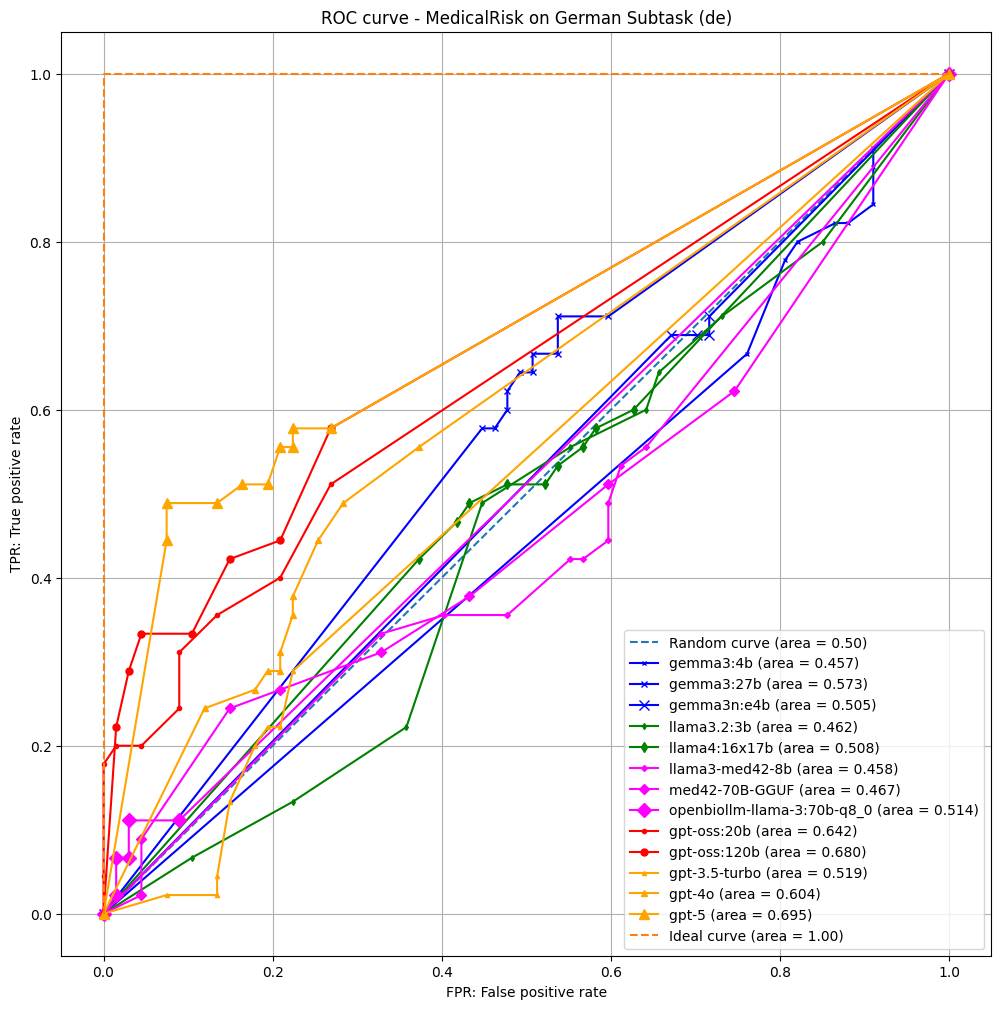

    parameter   roc-auc
0           4  0.456882
1          27  0.572968
2           4  0.504809
3           3  0.461857
4          17  0.508458
5           8  0.457711
6          70  0.466998
7          70  0.513599
8          20  0.641625
9         120  0.680265
10        170  0.518905
11        170  0.603814
12        520  0.695025


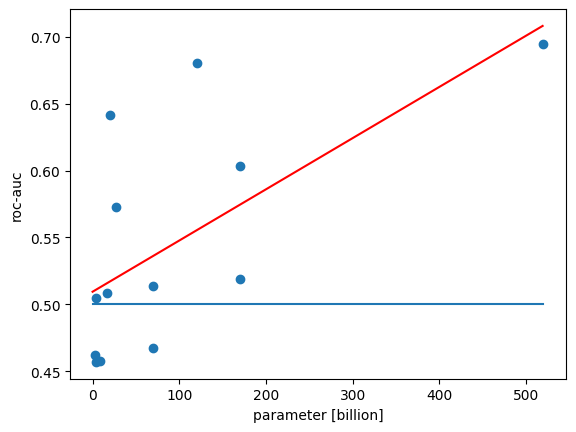

In [86]:
lang = 'de'
langlang = ''
fpr = {}
tpr = {}
thresholds = []
auc = {}
modeldisp = {}
marker = {}
markersize = {}
parameter = {}
color = {}
models = []

loadmodels()
drawplot()
drawregres()

cp: cannot stat '/content/results/ntcir18_mednlp-chat_de_test_17_01_2025.xlsx': No such file or directory


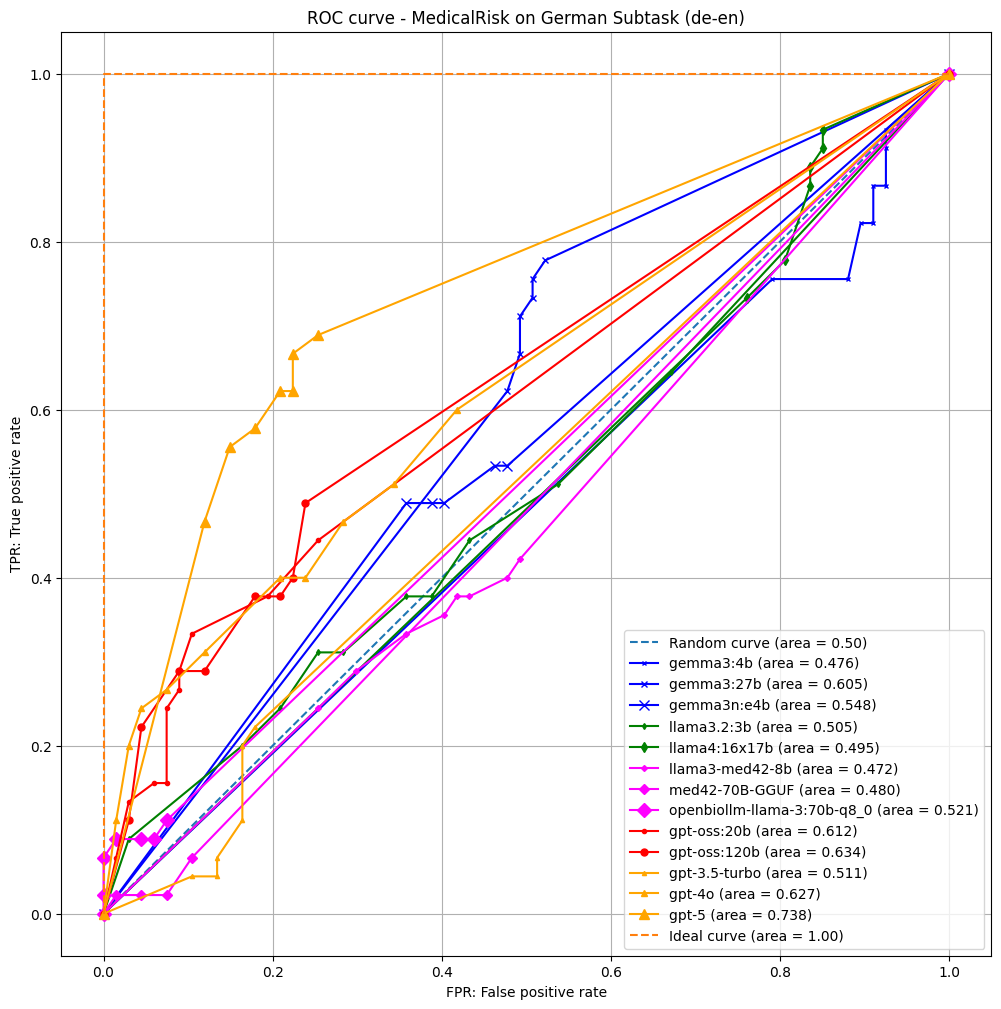

    parameter   roc-auc
0           4  0.475622
1          27  0.604975
2           4  0.548425
3           3  0.505307
4          17  0.495191
5           8  0.472471
6          70  0.480431
7          70  0.520730
8          20  0.612438
9         120  0.634494
10        170  0.511111
11        170  0.626534
12        520  0.737645


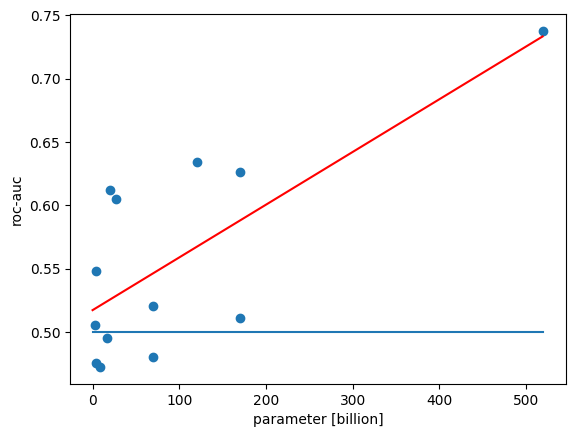

In [87]:
!cp '/content/results/ntcir18_mednlp-chat_de_test_17_01_2025.xlsx' '/content/'

lang = 'de'
langlang = '-en'
fpr = {}
tpr = {}
thresholds = []
auc = {}
modeldisp = {}
models = []

loadmodels()
drawplot()
drawregres()

## de-fr

cp: cannot stat '/content/results/ntcir18_mednlp-chat_de_test_17_01_2025.xlsx': No such file or directory


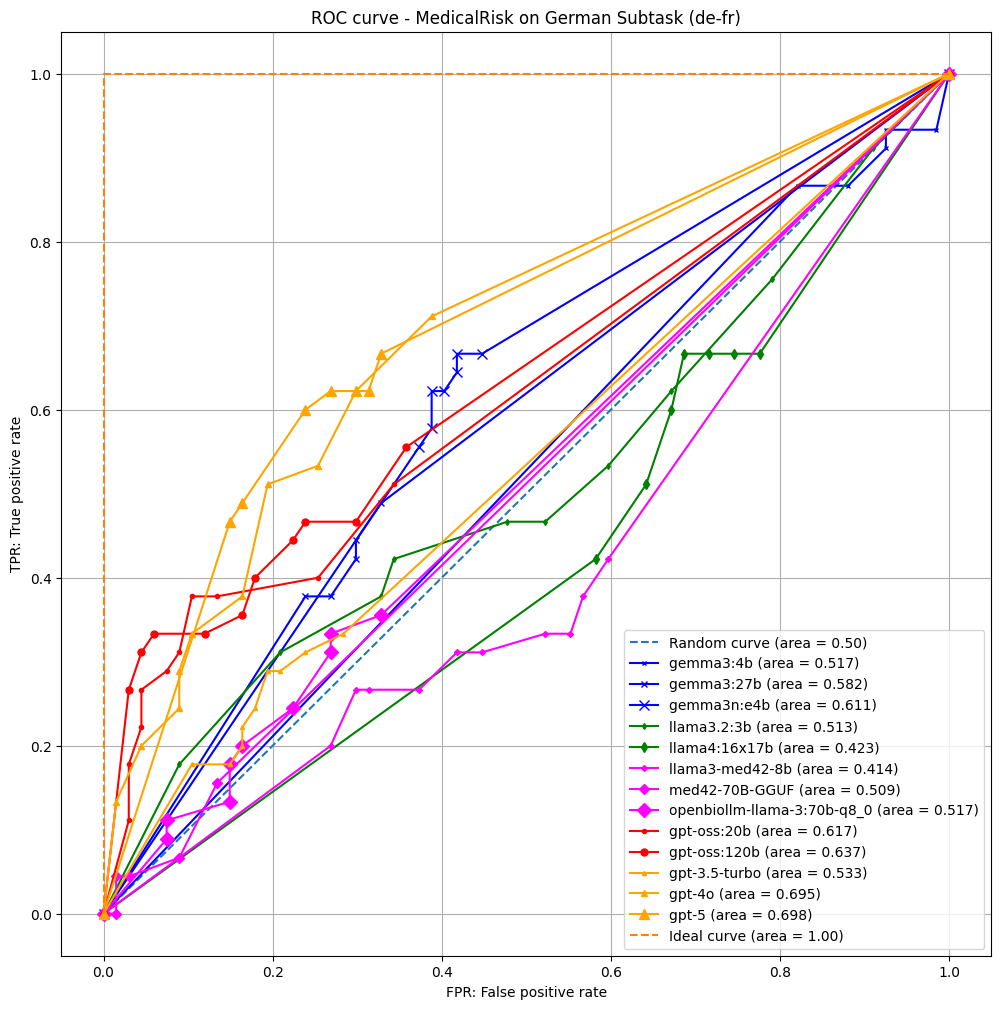

    parameter   roc-auc
0           4  0.517413
1          27  0.582255
2           4  0.610945
3           3  0.512604
4          17  0.423051
5           8  0.413765
6          70  0.509121
7          70  0.516750
8          20  0.617247
9         120  0.637313
10        170  0.532836
11        170  0.695357
12        520  0.698010


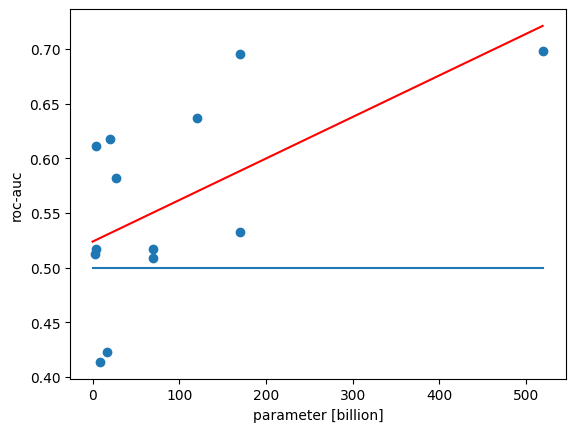

In [88]:
!cp '/content/results/ntcir18_mednlp-chat_de_test_17_01_2025.xlsx' '/content/'

lang = 'de'
langlang = '-fr'
fpr = {}
tpr = {}
thresholds = []
auc = {}
modeldisp = {}
models = []

loadmodels()
drawplot()
drawregres()

# EthicalRisk

In [89]:
taskname = "ethlist"
task = 'ethicalRisk'
taskdisp = "EthicalRisk"
index = 8


## de

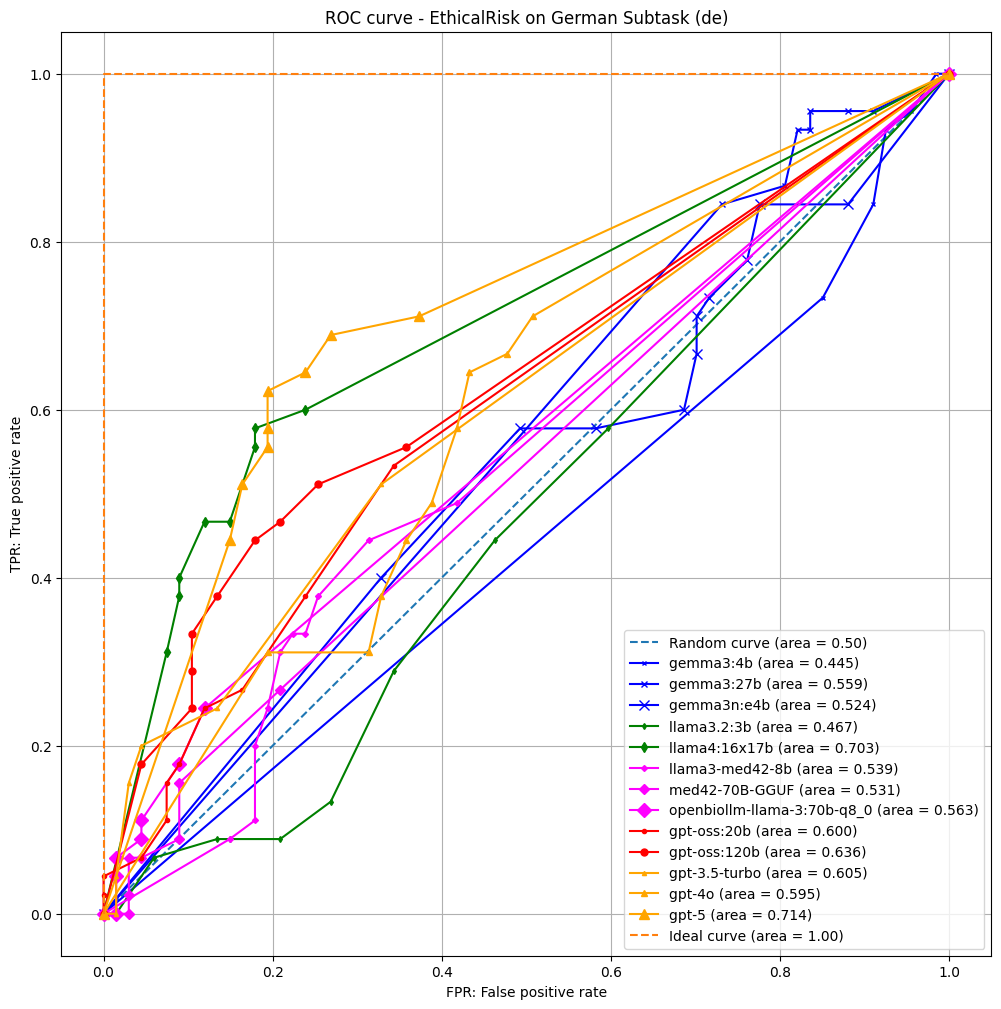

    parameter   roc-auc
0           4  0.444610
1          27  0.558872
2           4  0.523715
3           3  0.466667
4          17  0.702985
5           8  0.538806
6          70  0.530680
7          70  0.563018
8          20  0.600498
9         120  0.635987
10        170  0.604809
11        170  0.595025
12        520  0.713930


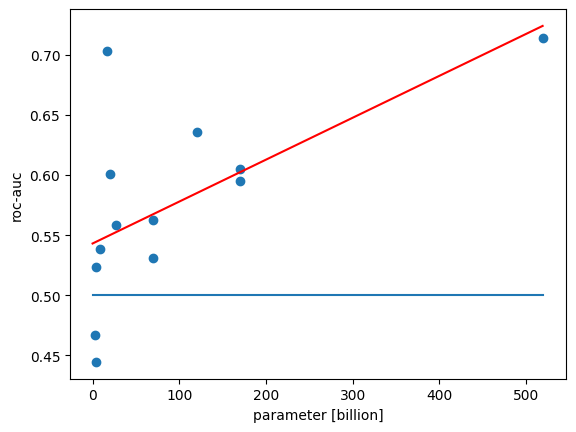

In [91]:
lang = 'de'
langlang = ''
fpr = {}
tpr = {}
thresholds = []
auc = {}
modeldisp = {}
models = []

loadmodels()
drawplot()
drawregres()

## de-en

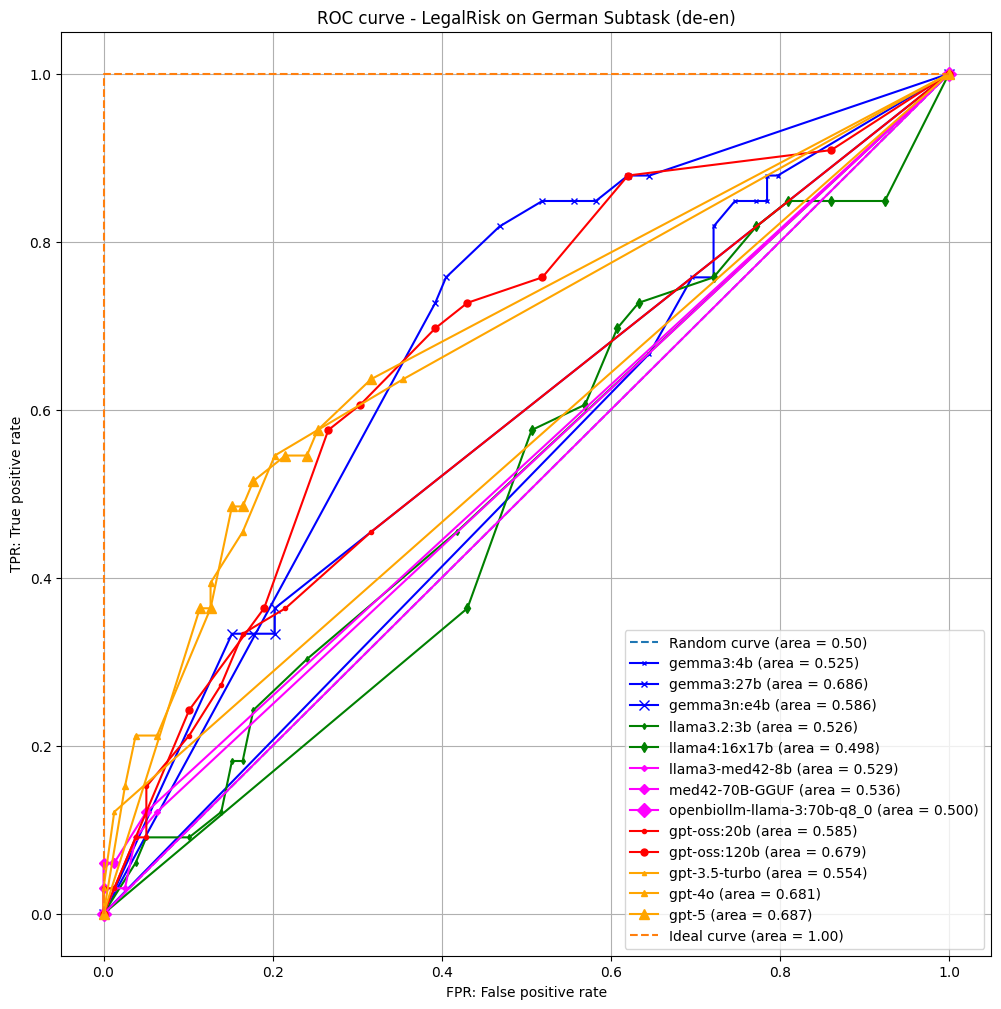

    parameter   roc-auc
0           4  0.525125
1          27  0.685846
2           4  0.585923
3           3  0.525508
4          17  0.498274
5           8  0.529152
6          70  0.536440
7          70  0.500000
8          20  0.585347
9         120  0.678558
10        170  0.554469
11        170  0.680859
12        520  0.687188


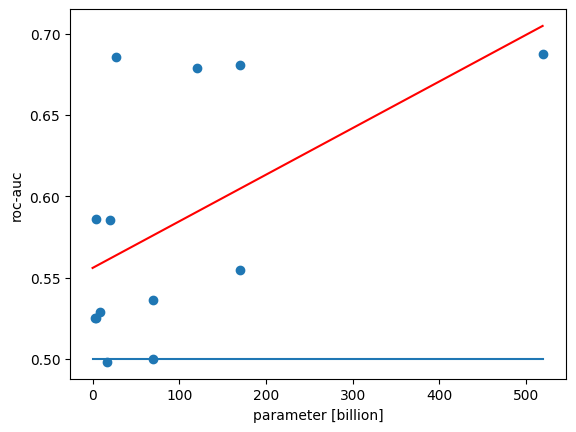

In [96]:
lang = 'de'
langlang = '-en'
fpr = {}
tpr = {}
thresholds = []
auc = {}
modeldisp = {}
models = []

loadmodels()
drawplot()
drawregres()

## de-fr

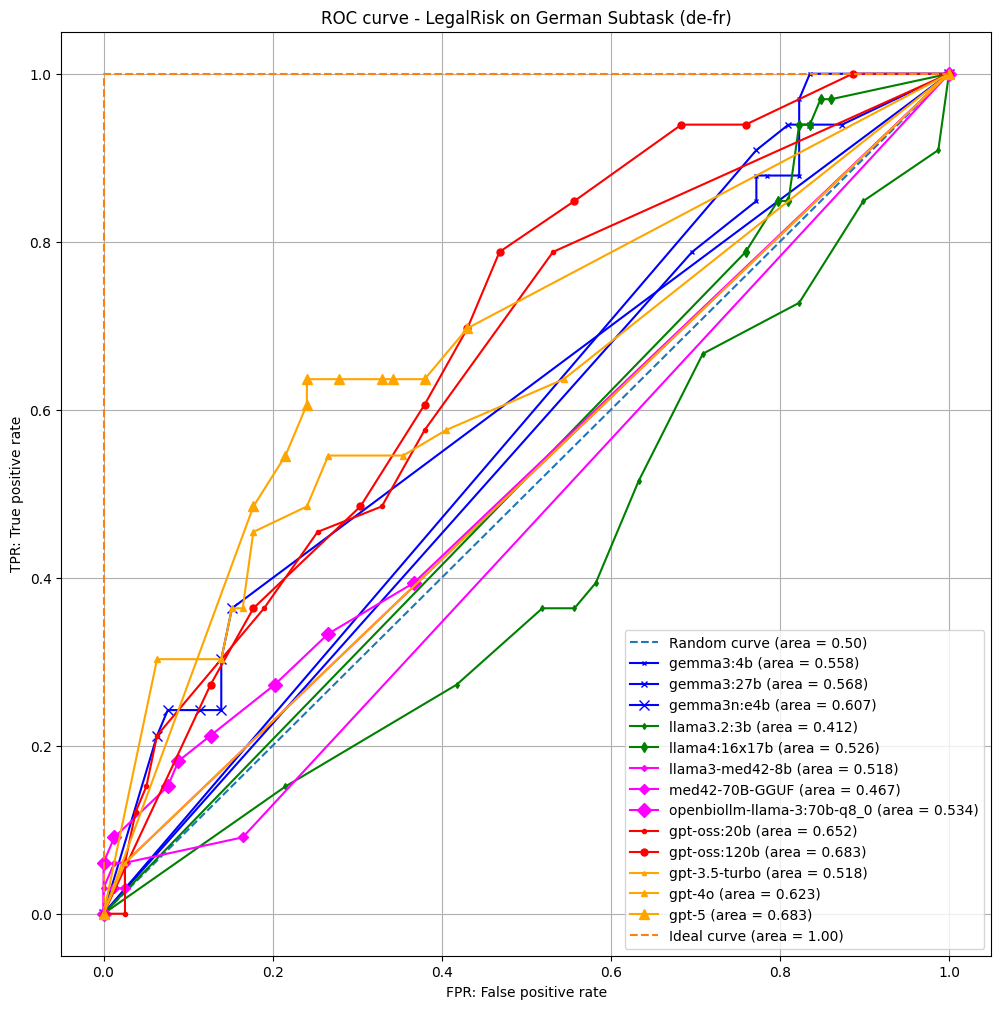

    parameter   roc-auc
0           4  0.557921
1          27  0.568278
2           4  0.607403
3           3  0.411968
4          17  0.525700
5           8  0.518220
6          70  0.466820
7          70  0.533755
8          20  0.652282
9         120  0.683353
10        170  0.517645
11        170  0.623322
12        520  0.682777


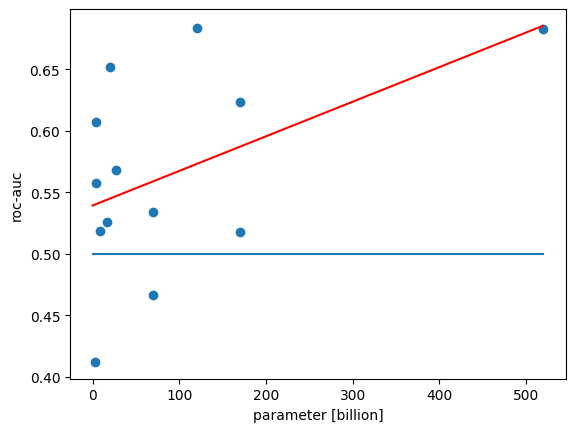

In [97]:
lang = 'de'
langlang = '-fr'
fpr = {}
tpr = {}
thresholds = []
auc = {}
modeldisp = {}
models = []

loadmodels()
drawplot()
drawregres()

# LegalRisk

In [98]:
taskname = "leglist"
task = 'legalRisk'
taskdisp = "LegalRisk"
index = 9


## de

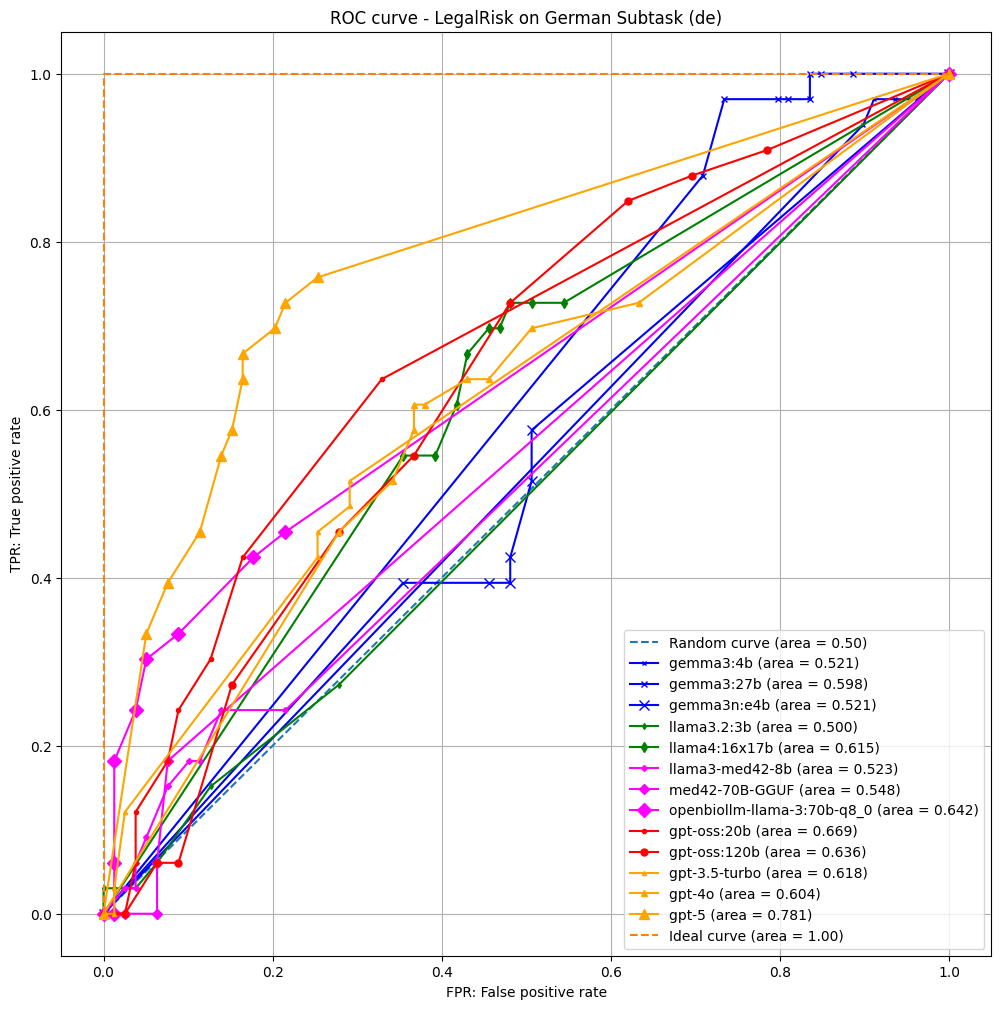

    parameter   roc-auc
0           4  0.520713
1          27  0.597622
2           4  0.520522
3           3  0.500384
4          17  0.614691
5           8  0.522631
6          70  0.547564
7          70  0.641926
8          20  0.669160
9         120  0.635980
10        170  0.617952
11        170  0.603951
12        520  0.780591


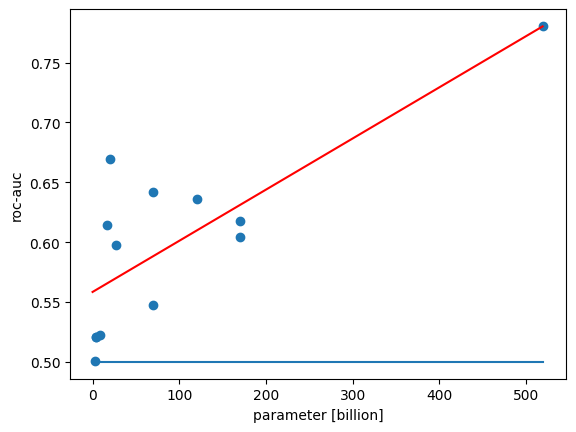

In [99]:
lang = 'de'
langlang = ''
fpr = {}
tpr = {}
thresholds = []
auc = {}
modeldisp = {}
models = []

loadmodels()
drawplot()
drawregres()

## de-en

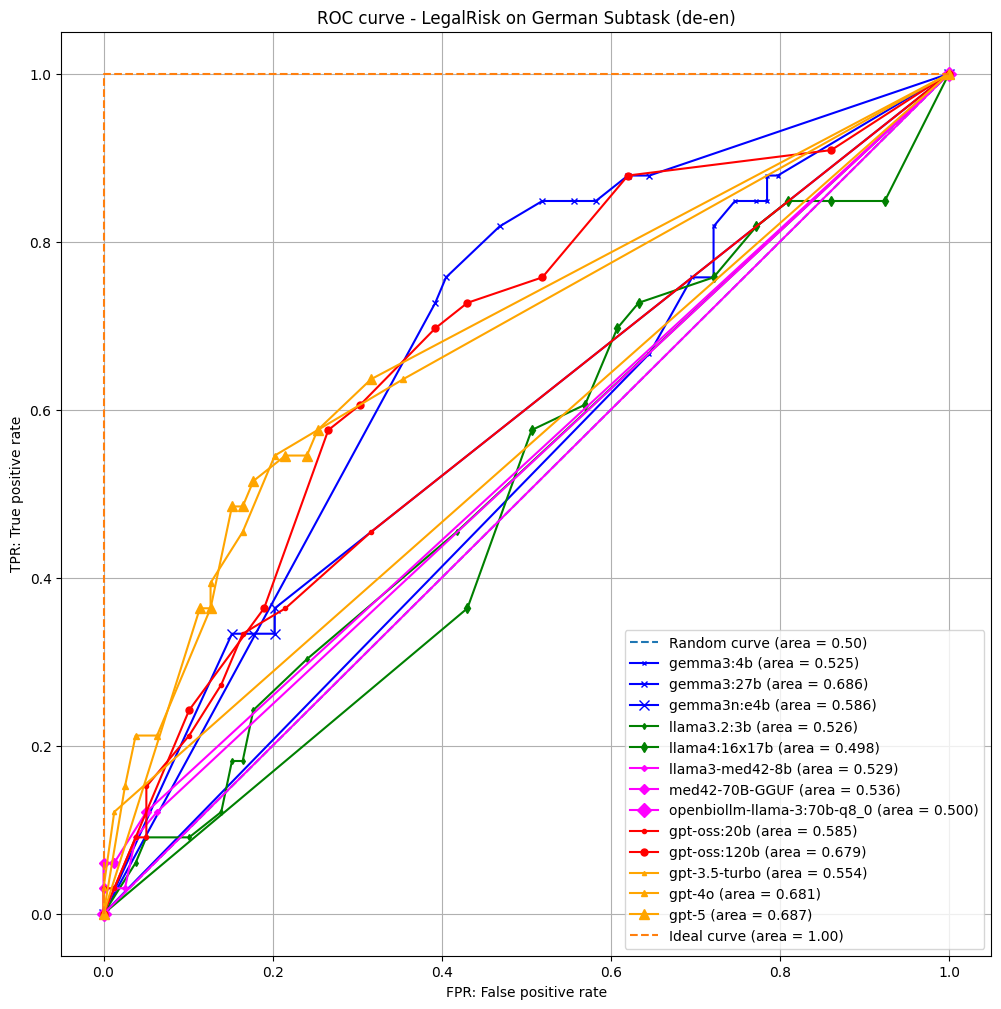

    parameter   roc-auc
0           4  0.525125
1          27  0.685846
2           4  0.585923
3           3  0.525508
4          17  0.498274
5           8  0.529152
6          70  0.536440
7          70  0.500000
8          20  0.585347
9         120  0.678558
10        170  0.554469
11        170  0.680859
12        520  0.687188


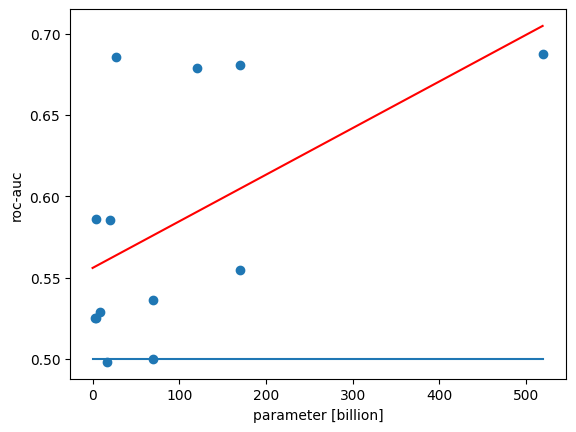

In [100]:
lang = 'de'
langlang = '-en'
fpr = {}
tpr = {}
thresholds = []
auc = {}
modeldisp = {}
models = []

loadmodels()
drawplot()
drawregres()

## de-fr

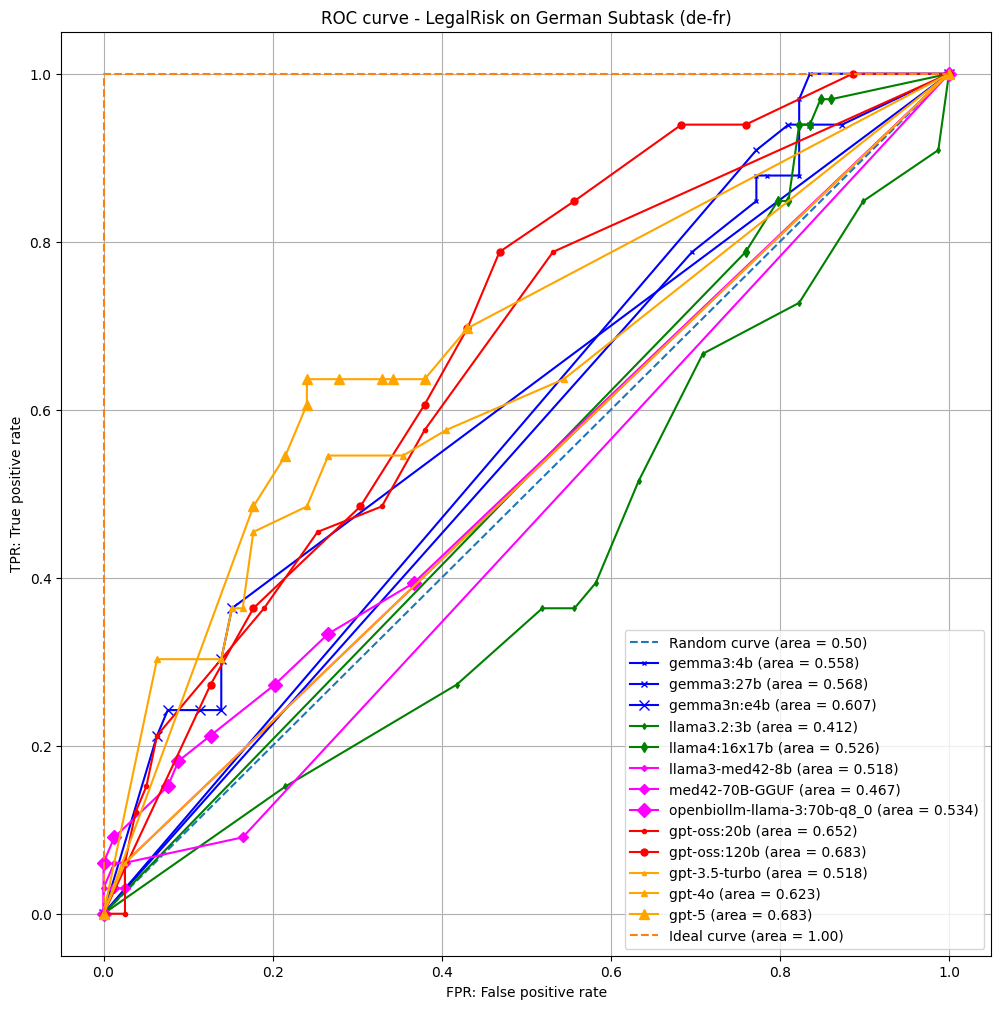

    parameter   roc-auc
0           4  0.557921
1          27  0.568278
2           4  0.607403
3           3  0.411968
4          17  0.525700
5           8  0.518220
6          70  0.466820
7          70  0.533755
8          20  0.652282
9         120  0.683353
10        170  0.517645
11        170  0.623322
12        520  0.682777


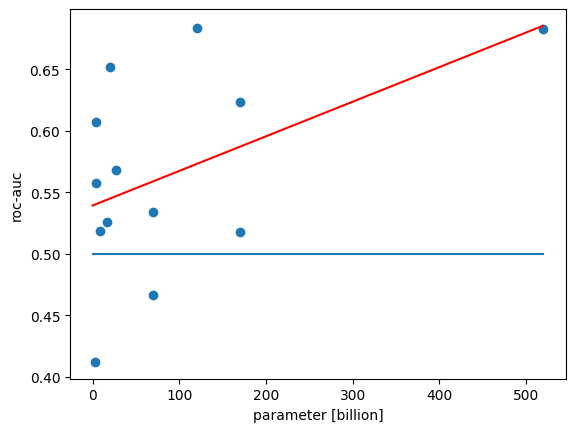

In [101]:
lang = 'de'
langlang = '-fr'
fpr = {}
tpr = {}
thresholds = []
auc = {}
modeldisp = {}
models = []

loadmodels()
drawplot()
drawregres()